Project 3 - Patrick Woods - UID: 113520266

In [91]:
#Maintain imports for all problems here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
import seaborn as sns

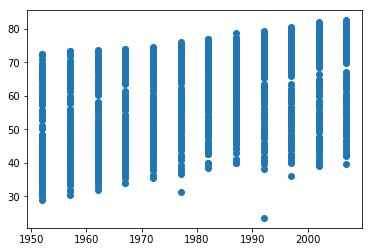

In [92]:
#Exercise 1
data = pd.read_csv("https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv", sep='\t')
plt.scatter(data['year'], data['lifeExp'])
plt.show()

Question 1:

Question 2:

Question 3:

Question 4:

Question 5:

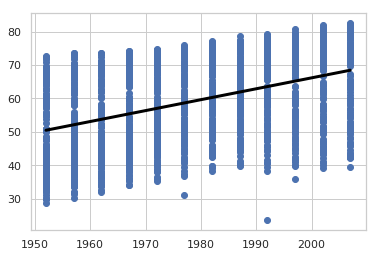

In [113]:
#Exercise 2
reg = lm.LinearRegression()
reg.fit(X=np.array(data['year']).reshape(-1,1),y=np.array(data['lifeExp']))
reg_line=reg.predict(np.array(data['year'].unique()).reshape(-1,1))
plt.scatter(data['year'], data['lifeExp'])
plt.plot(np.array(data['year'].unique()), reg_line, color='black', linewidth=3)

Question 6:

In [94]:
#code for question 6

Question 7:

In [95]:
#code for question 7
results = smf.ols('lifeExp ~ year', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Tue, 25 Jun 2019   Prob (F-statistic):           7.55e-80
Time:                        22:48:36   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

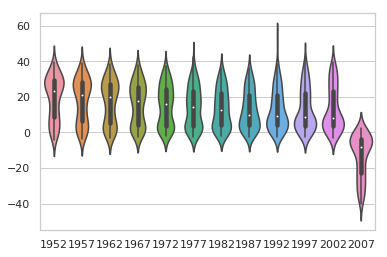

In [117]:
#Exercise 3
resid_list = list()
for year, exp in list(zip(data['year'], data['lifeExp'])):
    if year==data['year'].unique()[0]:
        resid_list.append(reg_line[0]-exp)
    elif year==data['year'].unique()[1]:
        resid_list.append(reg_line[1]-exp)
    elif year==data['year'].unique()[2]:
        resid_list.append(reg_line[2]-exp)
    elif year==data['year'].unique()[3]:
        resid_list.append(reg_line[3]-exp)
    elif year==data['year'].unique()[4]:
        resid_list.append(reg_line[4]-exp)
    elif year==data['year'].unique()[5]:
        resid_list.append(reg_line[5]-exp)
    elif year==data['year'].unique()[6]:
        resid_list.append(reg_line[6]-exp)
    elif year==data['year'].unique()[7]:
        resid_list.append(reg_line[7]-exp)
    elif year==data['year'].unique()[8]:
        resid_list.append(reg_line[8]-exp)
    elif year==data['year'].unique()[9]:
        resid_list.append(reg_line[9]-exp)
    elif year==data['year'].unique()[10]:
        resid_list.append(reg_line[10]-exp)
    else:
        resid_list.append(exp-reg_line[11])
        
sns.set(style="whitegrid")
ax = sns.violinplot(x=np.array(data['year']), y=np.array(resid_list))

Question 8: 

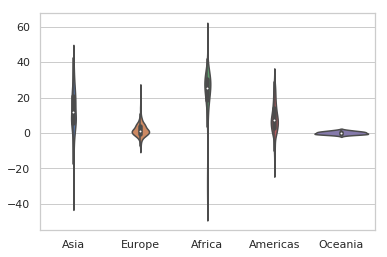

In [118]:
#Exercise 4
ax = sns.violinplot(x=np.array(data['continent']), y=np.array(resid_list))

Question 9:

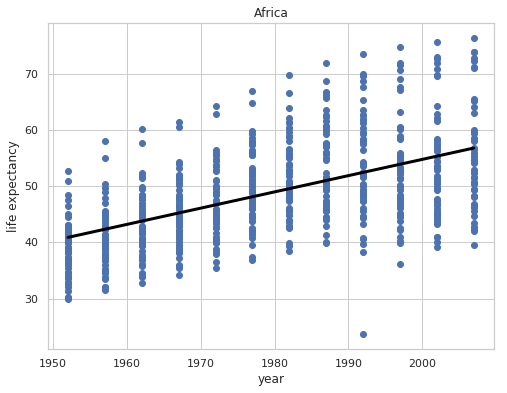

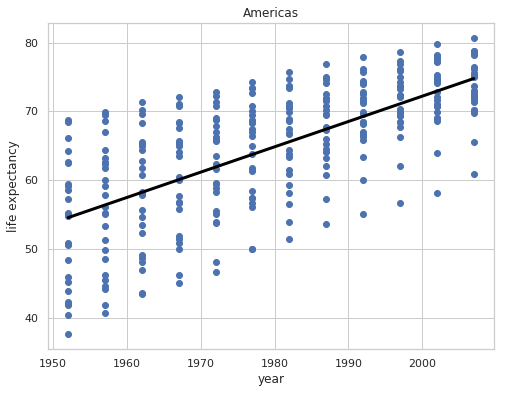

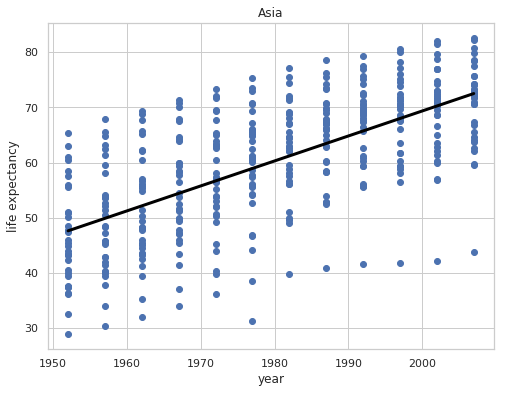

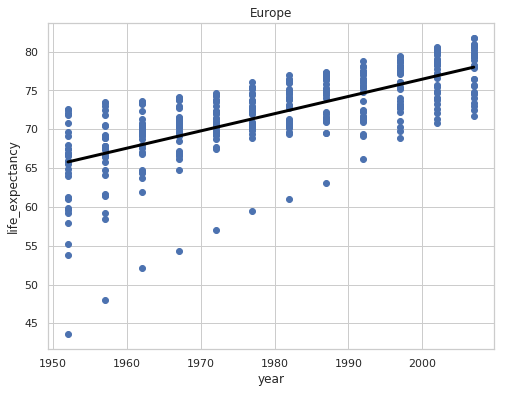

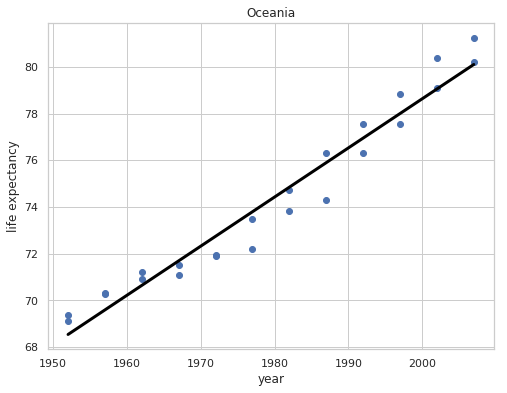

In [119]:
#Exercise 5
#setup the 5 graphs
fig, ax = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))
fig3, ax3 = plt.subplots(figsize=(8,6))
fig4, ax4 = plt.subplots(figsize=(8,6))
fig5, ax5 = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('life expectancy')
ax2.set_xlabel('year')
ax2.set_ylabel('life expectancy')
ax3.set_xlabel('year')
ax3.set_ylabel('life expectancy')
ax4.set_xlabel('year')
ax4.set_ylabel('life_expectancy')
ax5.set_xlabel('year')
ax5.set_ylabel('life expectancy')
counter = 0
bins = data.groupby(['continent'])

for key, group in bins:
    if counter == 0:
        ax.set_title(key)
        ax.scatter(group['year'], group['lifeExp'])
        reg.fit(X=np.array(group['year']).reshape(-1,1),y=np.array(group['lifeExp']))
        reg_line=reg.predict(np.array(group['year'].unique()).reshape(-1,1))
        ax.plot(np.array(group['year'].unique()), reg_line, color='black', linewidth=3)
    elif counter == 1:
        ax2.set_title(key)
        ax2.scatter(group['year'], group['lifeExp'])
        reg.fit(X=np.array(group['year']).reshape(-1,1),y=np.array(group['lifeExp']))
        reg_line=reg.predict(np.array(group['year'].unique()).reshape(-1,1))
        ax2.plot(np.array(group['year'].unique()), reg_line, color='black', linewidth=3)
    elif counter == 2:
        ax3.set_title(key)
        ax3.scatter(group['year'], group['lifeExp'])
        reg.fit(X=np.array(group['year']).reshape(-1,1),y=np.array(group['lifeExp']))
        reg_line=reg.predict(np.array(group['year'].unique()).reshape(-1,1))
        ax3.plot(np.array(group['year'].unique()), reg_line, color='black', linewidth=3)
    elif counter == 3:
        ax4.set_title(key)
        ax4.scatter(group['year'], group['lifeExp'])
        reg.fit(X=np.array(group['year']).reshape(-1,1),y=np.array(group['lifeExp']))
        reg_line=reg.predict(np.array(group['year'].unique()).reshape(-1,1))
        ax4.plot(np.array(group['year'].unique()), reg_line, color='black', linewidth=3)
    else:
        ax5.set_title(key)
        ax5.scatter(group['year'], group['lifeExp'])
        reg.fit(X=np.array(group['year']).reshape(-1,1),y=np.array(group['lifeExp']))
        reg_line=reg.predict(np.array(group['year'].unique()).reshape(-1,1))
        ax5.plot(np.array(group['year'].unique()), reg_line, color='black', linewidth=3)
    counter += 1

Question 11:

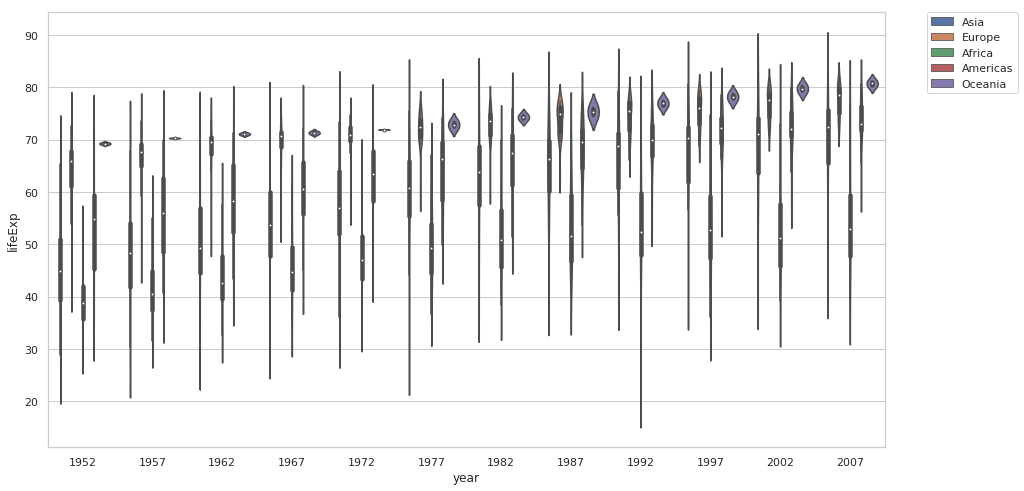

In [136]:
#Exercise 6 (based on the clarification on Piazza post @123):
fig, ax = plt.subplots(figsize=(15,8))

reg.fit(X=np.array(data['year']).reshape(-1,1),y=np.array(data['lifeExp']))
reg_line=reg.predict(np.array(data['year'].unique()).reshape(-1,1))
ax.plot(np.array(data['year'].unique()), reg_line, color='yellow', linewidth=3)
ax = sns.violinplot(x=data['year'], y=data['lifeExp'], hue=data['continent'])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)